# Baesyan Data Analysis Course - Chapter 1 Exercises
https://github.com/avehtari/BDA_course_Aalto/tree/master/exercises

### Exercise 1 (Basic probability theory notation and terms)
This can be trivial or you may need to refresh your memory on these concepts. Note that some terms may be different names for the same concept. Explain each of the following terms with one sentence:

* **probability:** a function with image ranging from 0 to 1
* **probability mass:** the probability of a discrete random variable taking a specified value  
* **probability density:** 
* **probability mass function (pmf):** a function that takes as input a value that may be assumed by a discrete random variable, and returns the probability of this given value
* **probability density function (pdf):** defines a distribution of a continuos random variable, and its integral gives the probability of the random variable being in the interval in which the integral is being calculated; the values in it's image may be interprested as the relative likehood that the random variable would equal the corresponding input
* **probability distribution:** carachterises a random variable by the likelihood of it's possible realizations
* **discrete probability distribution:** a probability distribution of a random variable defined in a sample space of integers
* **continuous probability distribution:** similarly, when the random variable may assumed real numbers, and not only integers
* **cumulative distribution function (cdf):** the sum (discrete case) or integral (continuos case) of the mass function of density function, respectivle; it's domain is the possible values that the random variable may or may not assume, and it's image is the correspoding probability of the random variable being less or equal to the input value
* **likelihood:** a relative measure of how likely it is to observe a given event; it's usually seen in the form $p(y|\theta)$, where $y$ is fixed and $\theta$ varies


### Exercise 2 (Basic computer skills)
This task deals with elementary plotting and computing skills needed during the rest of the course. For more about Python, see the docs (\href{https://docs.python.org/3/}{https://docs.python.org/3/})


* Plot the density function of Beta-distribution, with mean $\mu = 0.2$ and variance $\sigma^2=0.01$. The parameters $\alpha$ and $\beta$ of the Beta-distribution are related to the mean and variance according to the following equations
    \begin{align*}
    \alpha = \mu \left( \frac{\mu(1-\mu)}{\sigma^2} - 1 \right), \quad
    \beta = \frac{\alpha (1-\mu) }{\mu} \,.
\end{align*}
Useful Python functions: *numpy.arange* and *scipy.stats.beta.pdf*


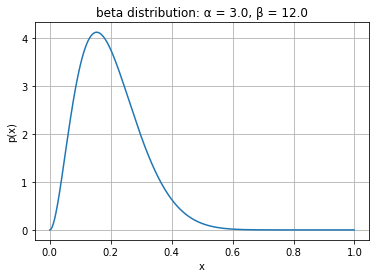

In [9]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt


# define function to return alpha and beta given mu and sigma for the beta dist
def par_beta(μ, σ):
    '''takes mean mu and variance sigma from a beta distribution and returns its parameters alpha and beta'''
    α = μ*(μ*(1-μ)/σ-1)
    β = α*(1-μ)/μ
    return np.round(α, 5), np.round(β, 5)

# define plot function
def plot_beta(α, β):
    grid_size = 1e3
    x_grid = np.arange(0, 1, 1/grid_size)
    beta_grid = beta.pdf(x_grid, α, β)

    # plot
    fig, ax = plt.subplots()
    ax.plot(x_grid, beta_grid)
    ax.set(xlabel = "x", ylabel = "p(x)", title = "beta distribution: α = " + str(α) + ", β = " + str(β))

    ax.grid()
    plt.show()
    
# grid and plot function call
# required parameters and grid
μ, σ = 0.2, 0.01
α, β = par_beta(μ, σ)
plot_beta(α, β)


* Take a sample of 1000 random numbers from the above distribution and plot a histogram of the results. Compare visually to the density function.
Useful Python functions: *scipy.stats.beta.rvs* and *matplotlib.pyplot.hist*

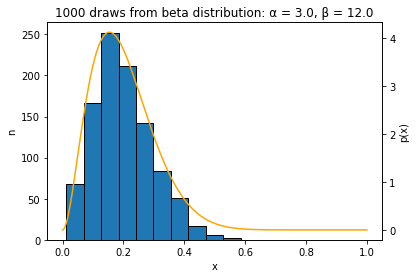

In [65]:
# drawing from beta dist
sample_size = 1e3
beta_sample = [beta.rvs(α, β) for i in range(int(sample_size))]

# plotting
fig, ax = plt.subplots()
ax.hist(beta_sample, edgecolor = 'black', histtype = "bar")
ax.set(xlabel = "x", ylabel = "n", title = str(int(sample_size)) + 
       " draws from beta distribution: α = " + str(α) + ", β = " + str(β))
# also plotting the pdf
ax2 = ax.twinx()
ax2.plot(x_grid, beta_grid, color = 'orange')
ax2.set_ylabel("p(x)")


plt.show()

*  Compute the sample mean and variance from the drawn sample. Verify that they match (roughly) to the true mean and variance of the distribution.

In [60]:
sample_mean = np.round(np.mean(beta_sample), 3)
sample_var = np.round(np.var(beta_sample), 3)

print("sample mean: "+ str(sample_mean) + "\n" + "μ: ", str(μ), "\nsample variance: ", str(sample_var), "\nσ: ", str(σ))

sample mean: 0.196
μ:  0.2 
sample variance:  0.009 
σ:  0.01


* Estimate the central 95\% probability interval of the distribution from the drawn samples.

In [72]:
cd95 = np.percentile(beta_sample, np.array([2.5, 97.5]))

print("the central 95% probability interval is", np.round(cd95, 3))

the central 95% probability interval is [0.044 0.408]


### Exercise 3 (Bayes' Theorem)
A group of researchers has designed a new inexpensive and
  painless test for detecting lung cancer. The test is
  intended to be an initial screening test for the population in
  general. A positive result (presence of lung cancer) from the test
  would be followed up immediately with medication, surgery or more
  extensive and expensive test. The researchers know from their
  studies the following facts:

* Test gives a positive result in 98$\%$  of the time when the
    test subject has lung cancer.
* Test gives a negative result in 96 $\%$ of the time when the
    test subject does not have lung cancer.
* In general population approximately one person in 1000 has
    lung cancer.

The researchers are happy with these preliminary results (about 97$\%$
success rate), and wish to get the test to market as soon as possible. How would you advise them? Base your answer on Bayes' rule computations.


**Answer:** Based on the avaliable information, one can use Baeys' Theorem to calculate other useful probabilities. Giving the bad news of cancer is not easy, and the follow up proceedures (further testing, medication, etc..) are costly financially and emotionally. So we might be ineterested in the probability in the probability of having cancer (potentially observable variable) given that the test is positive (actually observed variable). Defining some notation:

* t: test results, which is either $s$ if positive or $f$ if negative
* d: actual diagnostic, which is $c$ if individual actually have cancer, and $h$ otherwise

We know from the researchers studies that:

* $p(s|c) = 0.98$ (probability of the test being positive, given that it is applied in a individual with cancer)
* $p(f|h) = 0.96$ (probability of the test being negative, given that it is applied in a health individual)
* $p(c) = 0.01$, which implies $p(h) = 1 - 0.01$

So, using Bayes' rule, the probability of having cancer given that the test is positive is:

$$p(c|s) = \frac{p(c, s)}{p(s)} = \frac{p(s|c)p(c)}{p(s|c)p(c) + p(s|h)*p(h)} = 0.3311$$

It follows of a positive being a false positive is $1-0.3311 = 0.6689$

Similarly, the probability of a false negative, $p(f|c)$, can be calculated.

$$p(c|f) = \frac{p(c, f)}{p(f)} = \frac{p(f|c)p(c)}{p(f|c)p(c) + p(f|h)*p(h)} = 0.0004$$

Since $p(c)$ is the prior belive that a individual has cancer, without any knowledge about him, the above calculated probabilities may be finer if this prior is updated to the sample of individuals that actually have cancer (they probabily have some kind of symptom to seek the testing). This is likely to decrease the probability of false positive, which is realively high, and increase the probability of false negatives.

But considering the prior information at hand, when the researchers launch their test to use, it is important to note that the probability of positive being flase is $66.89\%$. But there is a really stronger confidence that a negative actually is a negative.

In [8]:
# calculation for ex. 3
print("p(c|s) =", 0.98*0.01/(0.98*0.01 + 0.02*0.99))
print("p(h|s) =", 1 - 0.98*0.01/(0.98*0.01 + 0.02*0.99))
print("p(c|f) =", 0.04*0.01/(0.04*0.01 + 0.96*0.99))

p(c|s) = 0.33108108108108103
p(h|s) = 0.668918918918919
p(c|f) = 0.0004206983592763989


### Exercise 4 (Bayes' theorem)
We have three boxes, A, B, and C. There are
  
* 2 red balls and 5 white balls in the box A,
* 4 red balls and 1 white ball in the box B, and
* 1 red ball and 3 white balls in the box C.

Consider a random experiment in which one of the boxes is randomly
selected and from that box, one ball is randomly picked up. After
observing the color of the ball it is replaced in the box it came
from. Suppose also that on average box A is selected 40\% of the time
and box B 10\% of the time (i.e. $P(A) = 0.4$).


* What is the probability of picking a red ball? 
* If a red ball was picked, from which box it most probably came from? 


Implement two functions that computes the probabilities.

In [117]:
def p_red(boxes, p_A = 0.4, p_B = 0.1):
    p_C = 1 - p_A - p_B
    p_Rc = np.array([boxes[i, 0] / sum(boxes[i,]) for i in range(np.shape(boxes)[0])])
    return sum(p_Rc * np.array([p_A, p_B, p_C]))

def p_box(boxes, p_A = 0.4, p_B = 0.1):
    p_C = 1 - p_A - p_B
    p_R = p_red(boxes, p_A, p_B)
    p_Rc = np.array([boxes[i, 0] / sum(boxes[i,]) for i in range(np.shape(boxes)[0])])
    return p_Rc * np.array([p_A, p_B, p_C])/p_R

boxes = np.array([[2,5], [4,1], [1,3]])
lab_boxes = ["A", "B", "C"]
p_R = p_red(boxes)
p_boxes = p_box(boxes)

print("probability of picking a red ball:", p_R)
print("if a red ball was picked, most probably it came from box", lab_boxes[np.argmax(p_boxes)])


probability of picking a red ball: 0.3192857142857143
if a red ball was picked, most probably it came from box C


### Exercise 5 (Bayes' theorem)
Assume that on average fraternal twins (two fertilized eggs and then could be of different sex) occur once in 150 births and identical twins (single egg divides into two separate
embryos, so both have the same sex) once in 400 births. **Note!** This is not the true values, see Exercise 1.6, page 28, in BDA3).
American male singer-actor Elvis Presley (1935 -- 1977) had a twin brother who died in birth.
What is the probability that Elvis was an identical twin?
Assume that an equal number of boys and girls are born on average.

Implement this as a function in R that computes the probability.

In [130]:
def p_identical_twin(fraternal_prob, identical_prob):
    p_G = fraternal_prob/2 + identical_prob
    return identical_prob / p_G
p_elvis_identical = p_identical_twin(1/150, 1/400)

print("the probability that Elvis was an identical twin is", np.round(p_elvis_identical, 3))

the probability that Elvis was an identical twin is 0.429
